# US SENATE 

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances as ed
from sklearn.cluster import KMeans as kmeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('114_congress.csv')

In [3]:
df.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
# How many Senators are there in each party
df['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

EUCLIDEAN DISTANCE

In [5]:
first_second = ed(df.iloc[0,3:],df.iloc[1,3:])
print(first_second)

/Users/amansharma/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/amansharma/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[[ 1.73205081]]


In [6]:
first_third = ed(df.iloc[0,3:],df.iloc[2,3:])
print(first_third)

[[ 3.31662479]]


/Users/amansharma/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/amansharma/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [7]:
km = kmeans(n_clusters= 2, random_state= 1) 
senate_distance = km.fit_transform(df.iloc[:,3:])
print (senate_distance)

[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 1.43833966  2.96866004]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.31287498  3.30758755]
 [ 0.33960656  3.41651746]
 [ 3.27058526  0.96734144]
 [ 0.33960656  3.41651746]
 [ 3.34875646  0.53945585]
 [ 0.33960656  3.41651746]
 [ 1.18084816  3.12695614]
 [ 1.23852221  3.13536063]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 2.6146248   2.05339992]
 [ 0.58487332  3.31421108]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.56324683  0.93036231]
 [ 3.42004795  0.24198446]
 [ 1.73847904  2.82326711]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.58487332  3.31421108]
 [ 3.27058526  0.92088553]
 

In [8]:
labels = km.labels_

In [9]:
print(pd.crosstab(labels, df["party"]))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [10]:
democratic_outliers = df[(labels ==1) & (df["party"]== 'D')]
print (democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


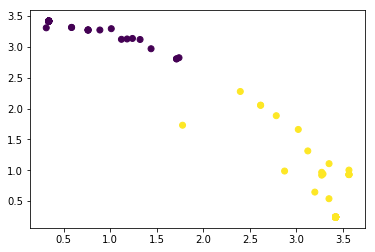

In [11]:
plt.scatter(x=senate_distance[:,0], y=senate_distance[:,1], c= labels)
plt.show()